In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='ticks')

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

SEED = 42
N = 5
K = 3
np.random.seed(SEED)

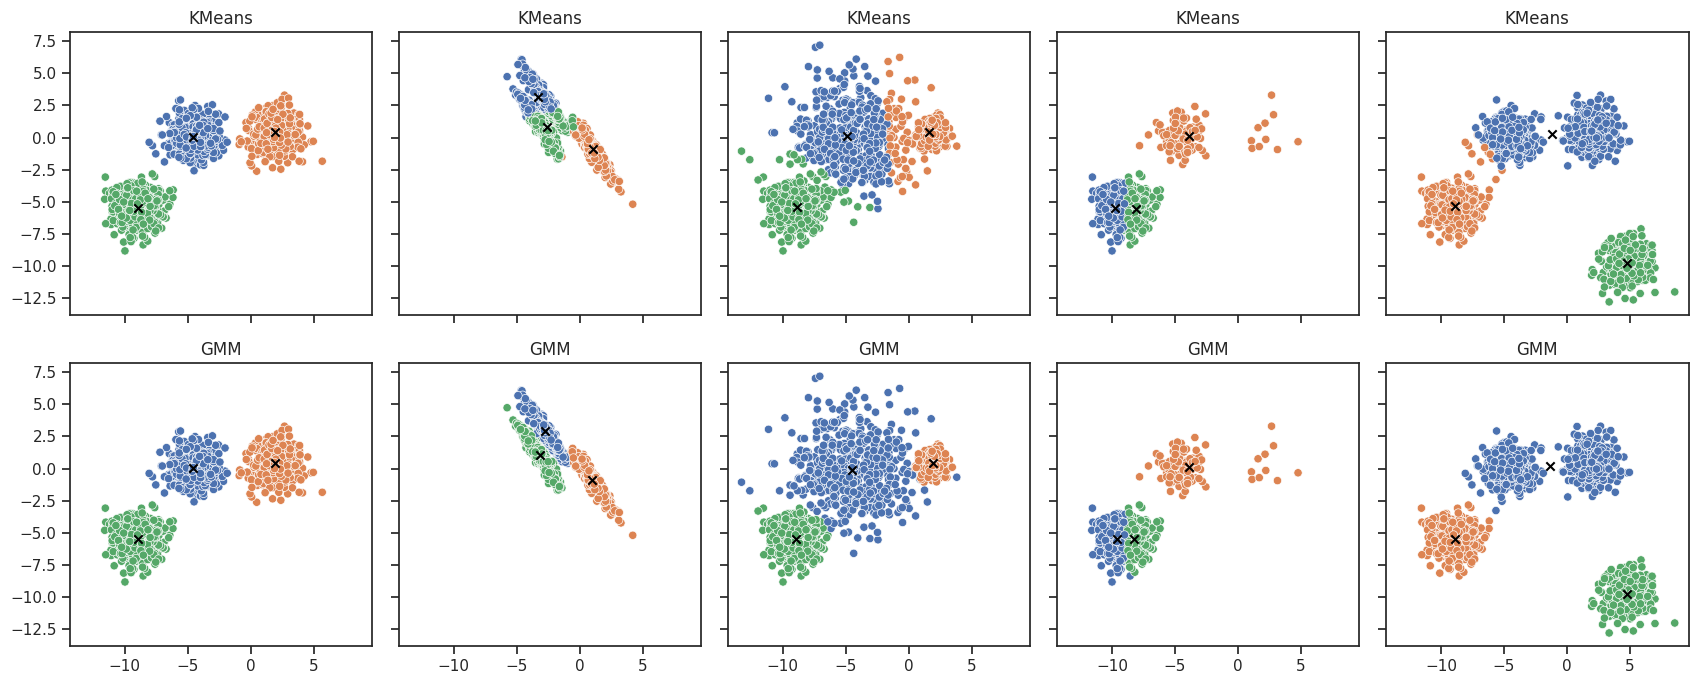

In [2]:
fig, axarr = plt.subplots(2, N, sharex=True, sharey=True, figsize=(17, 7))

for i in range(N):
    X = np.load(f"data/data{i+1}.npy")
    ax1, ax2 = axarr[:, i]
    
    kmeans = KMeans(K, random_state=SEED)
    y1 = kmeans.fit_predict(X)
    kmeans_centers = kmeans.cluster_centers_
    
    gmm = GaussianMixture(K, random_state=SEED)
    y2 = gmm.fit_predict(X)
    gmm_centers = gmm.means_
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y1, palette='deep', legend=False, ax=ax1)
    ax1.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', marker='x')
    ax1.set_title('KMeans')
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y2, palette='deep', legend=False, ax=ax2)
    ax2.scatter(gmm_centers[:, 0], gmm_centers[:, 1], c='black', marker='x')
    ax2.set_title('GMM')
    
fig.tight_layout()